In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression

**From seaborn load iris dataset and save it in iris dataframe**

In [4]:
iris = sns.load_dataset('iris')

In [5]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


**Return the head of the dataframe**

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
iris.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


**Find number of rows and columns in the dataset**

In [ ]:
iris.shape

(150, 5)

In [ ]:
iris['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [ ]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
iris['sepal_length'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [ ]:
iris['sepal_length'].max()

7.9

In [ ]:
iris['sepal_length'].min()

4.3

In [ ]:
iris['sepal_length'].mean()

5.843333333333334

In [ ]:
iris['sepal_length'].median()

5.8

**Data visualization**

Scatter plot

Scatter plot between sepal length and sepal width

Text(0.5, 1.0, 'Scatter plot on iris dataset')

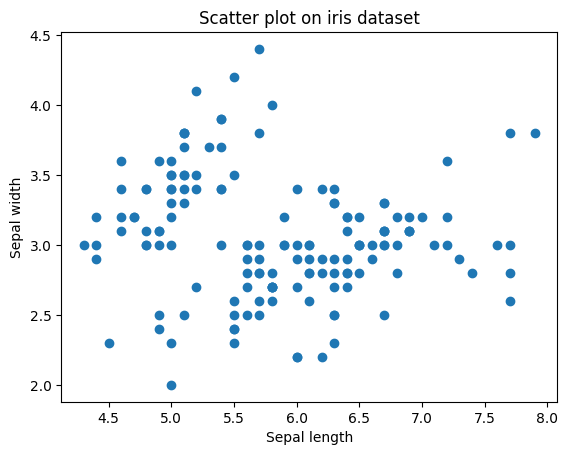

In [ ]:
plt.scatter(iris['sepal_length'],iris['sepal_width'])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Scatter plot on iris dataset')

scatter plot between petal length and petal width

Text(0.5, 1.0, 'scatter plot between petal length and petal width')

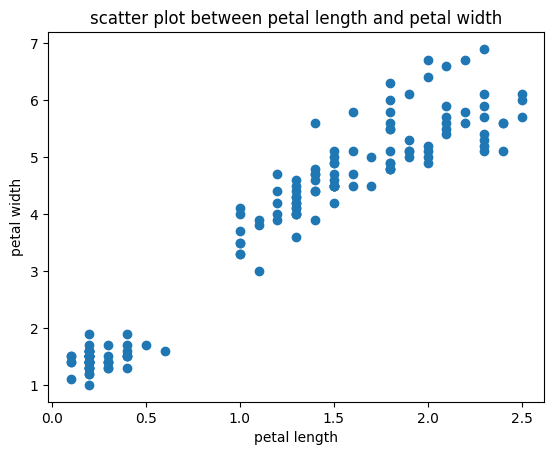

In [ ]:
plt.scatter(iris['petal_width'],iris['petal_length'])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('scatter plot between petal length and petal width')

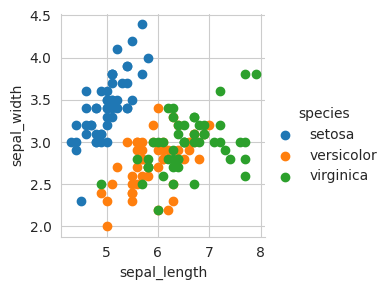

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue="species") \
.map(plt.scatter,"sepal_length" , "sepal_width").add_legend()
plt.show()

Pairplot

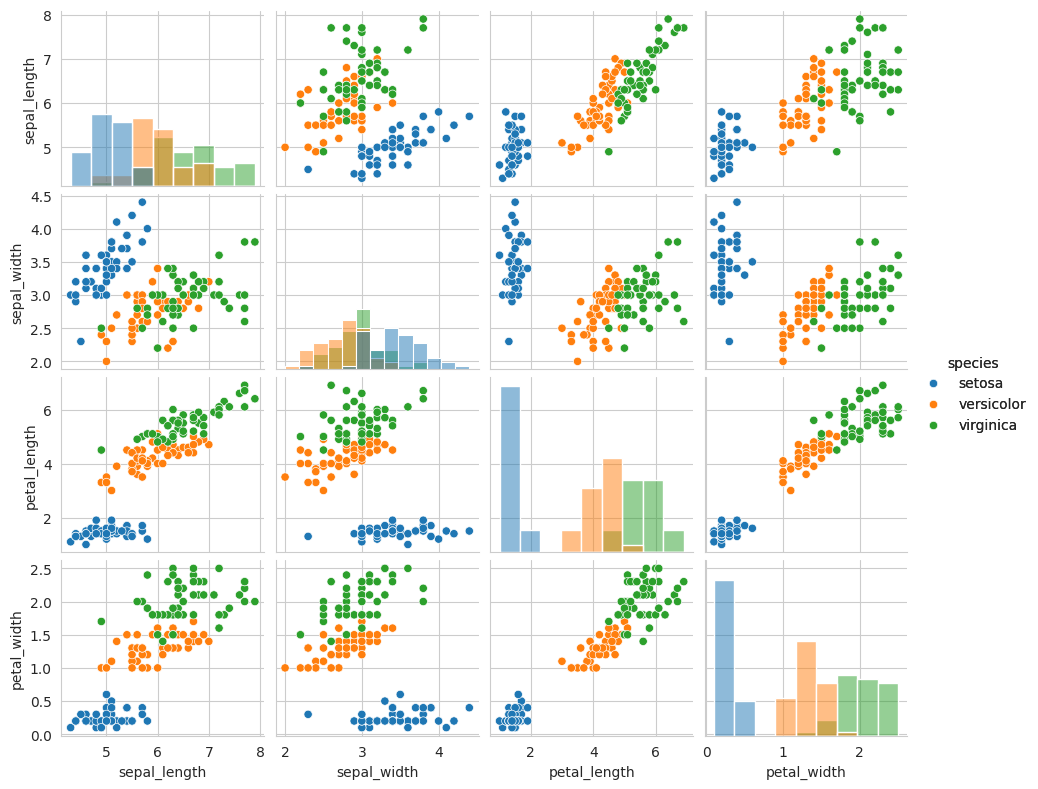

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(iris, hue= "species" , height = 2, diag_kind="hist").add_legend()
plt.show()

boxplot

<Axes: ylabel='sepal_length'>

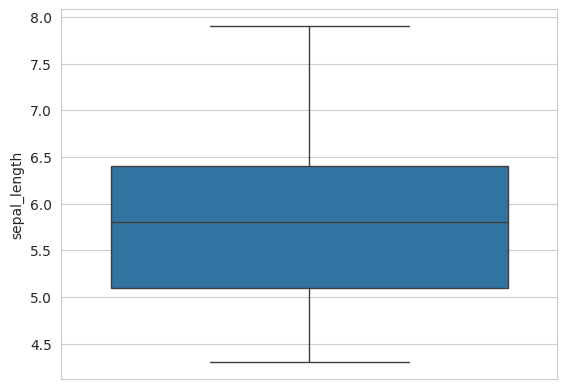

In [ ]:
sns.boxplot(y = "sepal_length",data = iris)

<Axes: xlabel='species', ylabel='sepal_length'>

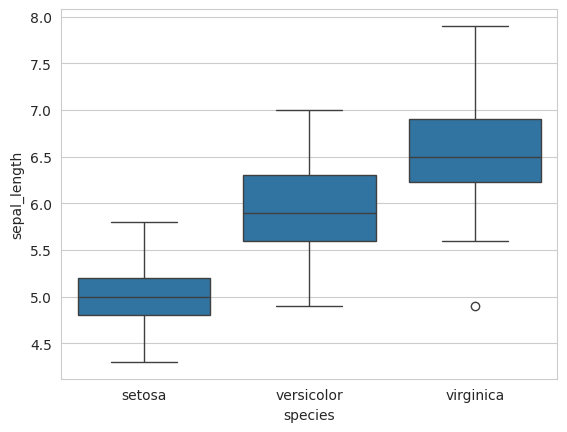

In [ ]:
sns.boxplot(x = "species", y = "sepal_length", data = iris)

**Line Plot**

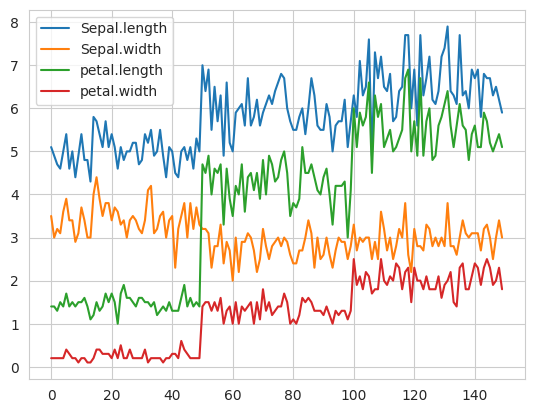

In [ ]:
plt.plot(iris['sepal_length'],label="Sepal.length")
plt.plot(iris['sepal_width'],label="Sepal.width")
plt.plot(iris['petal_length'],label="petal.length")
plt.plot(iris['petal_width'],label="petal.width")
plt.legend()

In [ ]:
iris.groupby("species").corr()

sepal_length  sepal_width  petal_length  petal_width
species                                                                      
setosa     sepal_length      1.000000     0.742547      0.267176     0.278098
           sepal_width       0.742547     1.000000      0.177700     0.232752
           petal_length      0.267176     0.177700      1.000000     0.331630
           petal_width       0.278098     0.232752      0.331630     1.000000
versicolor sepal_length      1.000000     0.525911      0.754049     0.546461
           sepal_width       0.525911     1.000000      0.560522     0.663999
           petal_length      0.754049     0.560522      1.000000     0.786668
           petal_width       0.546461     0.663999      0.786668     1.000000
virginica  sepal_length      1.000000     0.457228      0.864225     0.281108
           sepal_width       0.457228     1.000000      0.401045     0.537728
           petal_length      0.864225     0.401045      1.000000     0.322108
           petal_width       0.281108     0.537728      0.322108     1.000000

<Axes: ylabel='species-None'>

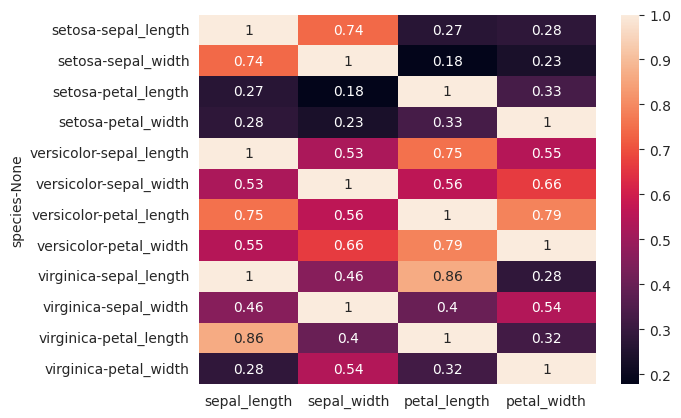

In [ ]:
sns.heatmap(iris.groupby("species").corr(),annot= True)

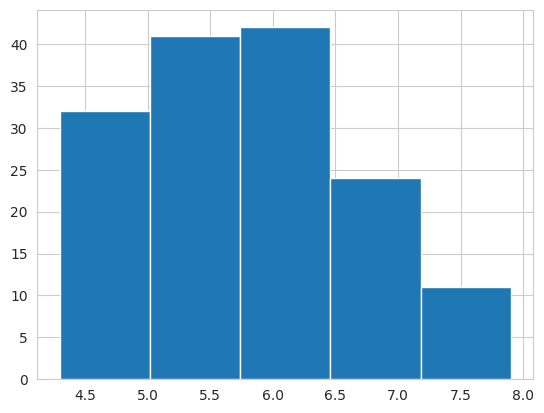

In [ ]:
plt.hist(iris['sepal_length'],bins = 5)
plt.show()

In [ ]:
x=iris.drop(['species'],axis = 1)

In [ ]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y = iris['species']

In [ ]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
x_train, x_test, y_train ,y_test = train_test_split(x,y,test_size = 0.2)

Add random state to train_test_split


In [ ]:
x_train, x_test, y_train ,y_test = train_test_split(x,y,test_size = 0.4)

**Logistic Regression**

In [ ]:
lr=LogisticRegression(solver = 'newton-cg')

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression(solver='newton-cg')

In [ ]:
y_pred1 = lr.predict(x_test)

 **Get the confusion matrix**

In [ ]:
confusion_matrix(y_test,y_pred1)

array([[19,  0,  0],
       [ 0, 21,  1],
       [ 0,  0, 19]])

Text(0.5, 23.52222222222222, 'Predicted  label')

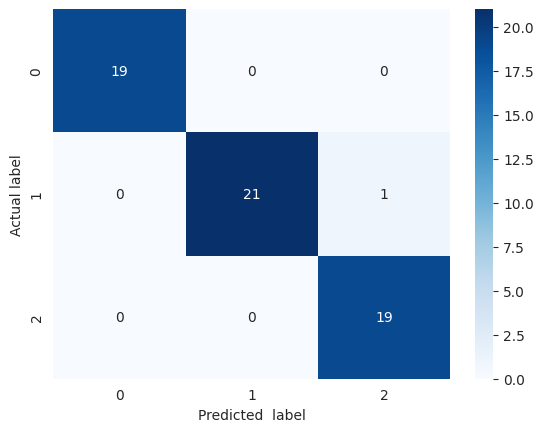

In [ ]:
sns.heatmap(data=confusion_matrix(y_test,y_pred1), annot=True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted  label')

In [ ]:
accuracy_score(y_test,y_pred1)

0.9833333333333333

**Decision tree**

In [ ]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred2=dtree.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred2)

array([[19,  0,  0],
       [ 0, 20,  2],
       [ 0,  0, 19]])

Text(0.5, 23.52222222222222, 'Predicted  label')

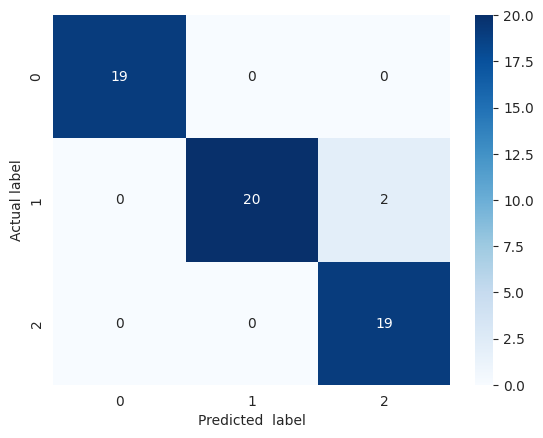

In [ ]:
sns.heatmap(data=confusion_matrix(y_test,y_pred2), annot=True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted  label')

In [ ]:
accuracy_score(y_test,y_pred2)

0.9666666666666667

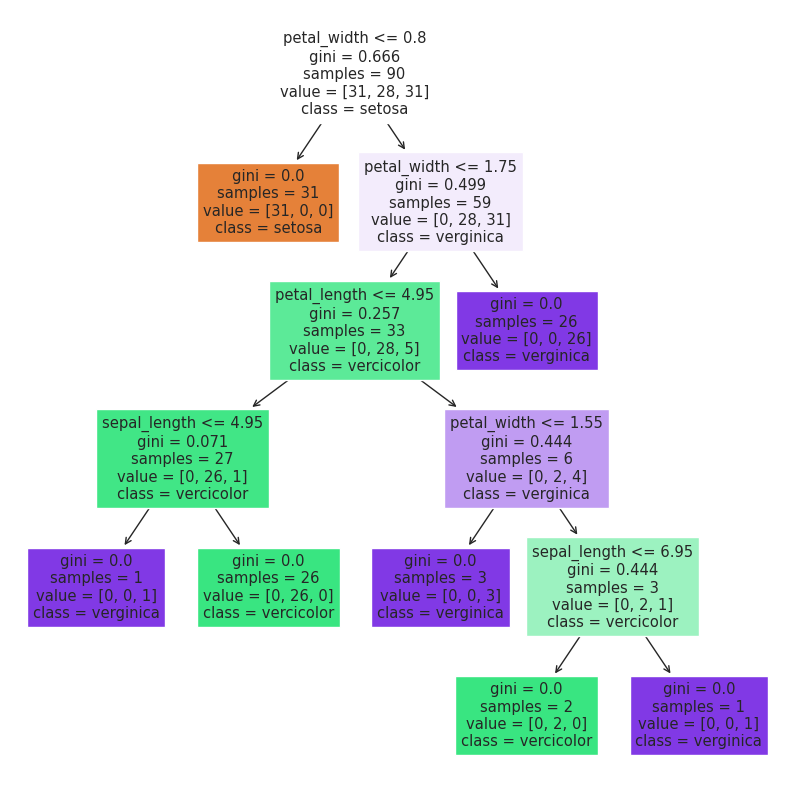

In [ ]:
plt.figure(figsize=(10,10))
dec_tree = plot_tree(decision_tree=dtree, feature_names= iris.columns[:-1],
class_names = ["setosa","vercicolor","verginica"], filled = True)

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators = 2000)

use 100 decision tree in random forest

In [ ]:
clf = RandomForestClassifier(n_estimators = 100)

In [ ]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred3=clf.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred3)

array([[19,  0,  0],
       [ 0, 21,  1],
       [ 0,  0, 19]])

Text(0.5, 23.52222222222222, 'Predicted  label')

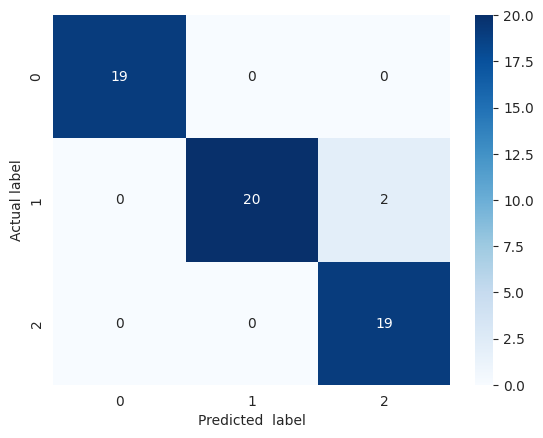

In [ ]:
sns.heatmap(data=confusion_matrix(y_test,y_pred2), annot=True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted  label')

In [ ]:
accuracy_score(y_test,y_pred3)

0.9833333333333333